In [ ]:
#Instituto Superior Politécnico de Córdoba - Tecnicatura Superior en Ciencia de Datos e Inteligencia Artificial.
#Código Practica profezionalizante 1 - Caso de Estudio Casos de Covid - Ciudad de Córdoba - Provincia de Córdoba
#Grupo Formado por: Carina Giovine - Octavio Gómez - Eduardo Herrero Rivero

In [23]:
# Importo todas las bibliotecas necesarias 
# ==============================================================================

import pymongo
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
from matplotlib import pyplot as plt


In [3]:
# Conecto a Mongodb 
# ==============================================================================
client = pymongo.MongoClient('localhost',27017)
db = client['CCCba_Ex']

# Creo la colección del mismo nombre
# ==============================================================================
collection=db['CCCba_collection_Ex']

# Cargo los datos del archivo csv
# ==============================================================================
df_2=pd.read_excel('C:\\Users\\User\\Desktop\\TRABAJO FINAL MONGODB\\CCCba.xlsx')

# Genera un diccionario a partir de un dataframe Pandas
# ==============================================================================
data_2=df_2.to_dict('records')

# Ahora inserto
# ==============================================================================
collection.insert_many(data_2)
print("La información ha sido cargada exitosamente")

La información ha sido cargada exitosamente


In [4]:
print(df_2)


         Fecha  Casos registrados Ciudad de Córdoba (acumulado)  \
0   2020-03-25                                               21   
1   2020-03-26                                               22   
2   2020-03-28                                               24   
3   2020-03-29                                               30   
4   2020-03-30                                               30   
..         ...                                              ...   
479 2021-07-18                                           199482   
480 2021-07-19                                           199720   
481 2021-07-20                                           200028   
482 2021-07-21                                           200867   
483 2021-07-22                                           201937   

     Casos registrados Provincia de Córdoba (acumulado)  \
0                                                   49    
1                                                   52    
2                 

In [5]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 7 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   Fecha                                               484 non-null    datetime64[ns]
 1   Casos registrados Ciudad de Córdoba (acumulado)     484 non-null    int64         
 2   Casos registrados Provincia de Córdoba (acumulado)  484 non-null    int64         
 3   Fallecidos Provincia de Córdoba (acumulado)         484 non-null    int64         
 4   Nuevos casos registrados Ciudad de Córdoba          484 non-null    int64         
 5   Nuevos casos registrados Provincia de Córdoba       484 non-null    int64         
 6   Nuevos Fallecidos Provincia de Córdoba              484 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 26.6 KB


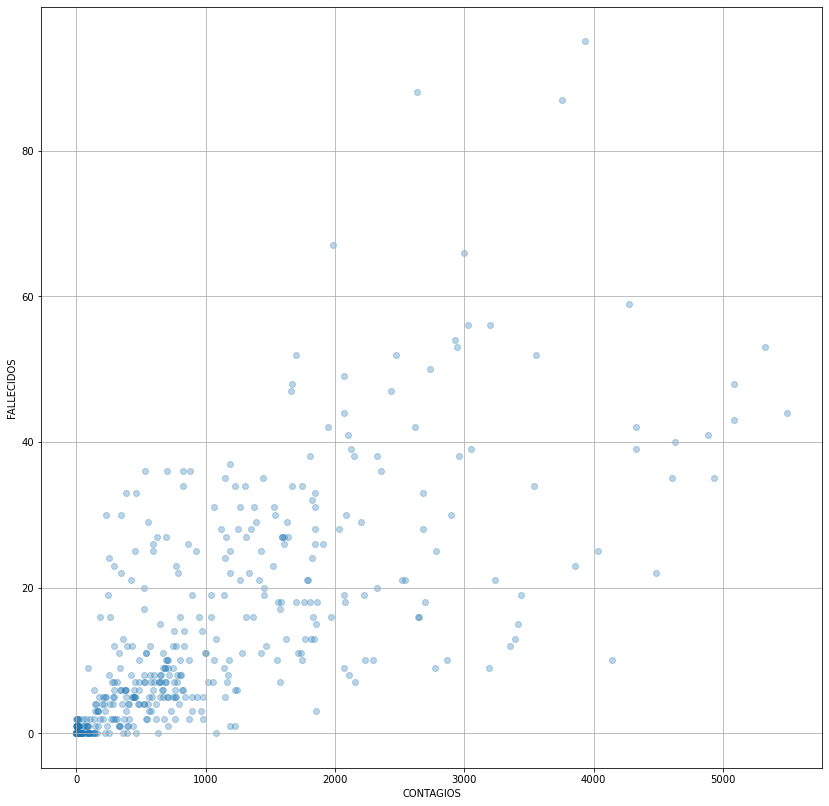

In [7]:
# Defino tamaño del grafico
# ==============================================================================
fig = plt.figure(figsize=(14,14)) 

# Defino ejes
# ==============================================================================
X = df_2['Fecha']
plt.scatter(df_2['Nuevos casos registrados Provincia de Córdoba'],df_2['Nuevos Fallecidos Provincia de Córdoba'], alpha=0.3)

plt.plot()

# Etiquetas del grafico
# ==============================================================================
lt.xlabel('CONTAGIOS')
plt.ylabel('FALLECIDOS')
plt.grid()

In [10]:
# Preparamos datos para la regresion regresion lineal con  Scikitlearn  
# ==============================================================================
df_2.keys()

# x = Fechas y = Fallecidos
# ==============================================================================
nFallecidos = df_2['Nuevos Fallecidos Provincia de Córdoba'].values.reshape(-1,1)
nFallecidos
nContagios = df_2['Nuevos casos registrados Provincia de Córdoba'].values.reshape(-1,1)

# nContagios
# ==============================================================================
Fechas = df_2['Fecha'].values.reshape(-1,1)
Fechas
regresion_lineal = LinearRegression()
regresion_lineal.fit(nContagios,nFallecidos)
fallecidos_pred = regresion_lineal.predict(nContagios)
fallecidos_pred
nFallecidos


array([[ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 2],
       [ 0],
       [ 1],
       [ 0],
       [ 1],
       [ 1],
       [ 0],
       [ 1],
       [ 1],
       [ 0],
       [ 0],
       [ 0],
       [ 2],
       [ 2],
       [ 2],
       [ 1],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 0],
       [ 1],
       [ 1],
       [ 0],
       [ 0],
       [ 2],
       [ 0],
       [ 0],
       [ 1],
       [ 0],
       [ 1],
       [ 0],
       [ 0],
       [ 1],
       [ 0],
       [ 1],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 0],
       [ 1],
       [ 0],
       [ 1],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],

In [11]:
# y=mx+c
# ==============================================================================
m = regresion_lineal.coef_[0][0]
c = regresion_lineal.intercept_[0]
label = r'$nFallecidos = %0.4f*nContagios %+0.4f$'%(m,c)
print(label)

$nFallecidos = 0.0103*nContagios +2.8438$


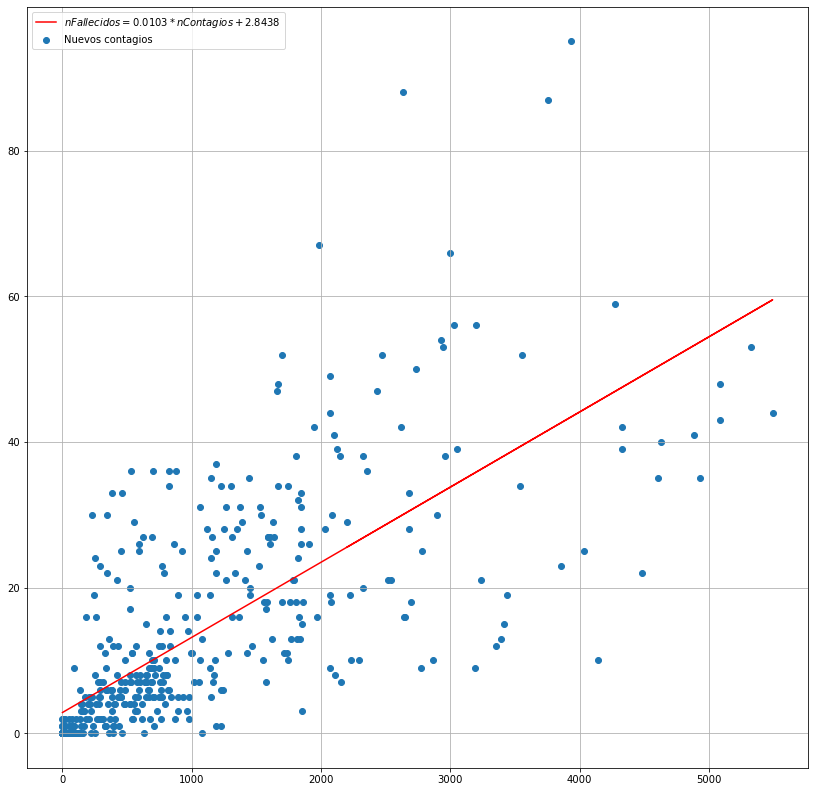

In [12]:
# Grafico
# ==============================================================================
fig = plt.figure(figsize=(14,14)) 

plt.scatter(nContagios, nFallecidos, label='Nuevos contagios')
plt.plot(nContagios, fallecidos_pred, color='red', label=label)
plt.plot()

plt.grid()
plt.legend()

## Intentamos una regresion logistica con Statsmodels

In [15]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = stats.pearsonr(x = df_2['Casos registrados Provincia de Córdoba (acumulado)'], y =  df_2['Fallecidos Provincia de Córdoba (acumulado)'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])


Coeficiente de correlación de Pearson:  0.9799207036648769
P-value:  0.0


In [17]:
# División de los datos en train y test
# ==============================================================================
X = df_2['Casos registrados Provincia de Córdoba (acumulado)']
y = df_2['Fallecidos Provincia de Córdoba (acumulado)']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [24]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


[[2825.71199565]
 [6013.55436351]
 [ 233.62959334]]

El error (rmse) de test es: 328.27213119506223


In [25]:
# Creación del modelo utilizando el modo fórmula (similar a R)
# ==============================================================================

# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     9140.
Date:                Fri, 03 Sep 2021   Prob (F-statistic):          2.44e-270
Time:                        17:50:56   Log-Likelihood:                -2811.4
No. Observations:                 387   AIC:                             5627.
Df Residuals:                     385   BIC:                             5635.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        219.5573     24.313      9.031      0.0

In [26]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)

array([[1.71755204e+02, 2.67359304e+02],
       [1.29905111e-02, 1.35360468e-02]])

In [27]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1892.467896,17.637644,1857.789734,1927.146059,1210.000428,2574.935364
1,1848.248124,17.624086,1813.596620,1882.899629,1165.782010,2530.714238
2,251.787022,24.081557,204.439194,299.134850,-431.441407,935.015452
3,1352.188227,18.291200,1316.225080,1388.151374,669.654258,2034.722195


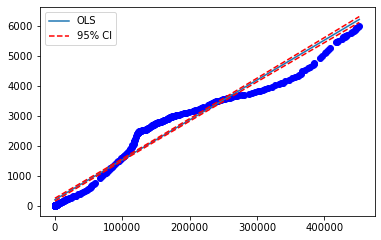

In [28]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "blue")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.05)
ax.legend();


In [29]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")



El error (rmse) de test es: 328.27213119506223
